# Implementing SGD on Boston Home Prices Dataset :- Custom Implementation vs SKLearn Implementation :-

<b> <font color="black"> Importing the Required Modules & Packages:- </font> </b>

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

<b> <font color="black"> Loading the Dataset :- </font> </b>

In [2]:
boston = load_boston()
X = boston.data
Y = boston.target

In [3]:
print(X.shape)
print(boston.feature_names)
print(Y.shape)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506,)


X here basically consists of all the features that we have whereas Y is the home prices that we are to predict. As seen over here the shape of dataset X :(506,13) ie. it has 506 rows and a total of 13 features that are named as shown above. However we'll understand what each of these features mean when we will soon have a look at the same. Y on the other hand is a single column with 506 rows. 

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
bos_df1 = pd.DataFrame(X)
bos_df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now I am basically renaming the column indices that were obtained by default with their respective feature names. This is carried out as follows:

In [6]:
bos_df1.columns = boston.feature_names
print(bos_df1.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [7]:
bos_df2 = pd.DataFrame(Y)
bos_df2.columns = ['Price']
print(bos_df2.head())

   Price
0   24.0
1   21.6
2   34.7
3   33.4
4   36.2


In [8]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,test_size=0.30,random_state=5)

In [9]:
print("The Training Dataset shapes are as follows:")
print(X_Train.shape)
print(Y_Train.shape)

print("*"*100)

print("The Test Dataset shapes are as follows:")
print(X_Test.shape)
print(Y_Test.shape)

The Training Dataset shapes are as follows:
(354, 13)
(354,)
****************************************************************************************************
The Test Dataset shapes are as follows:
(152, 13)
(152,)


In [10]:
# scaler = preprocessing.StandardScaler().fit(X)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_Train_sc = sc.fit_transform(X_Train)
X_Test_sc = sc.transform(X_Test)

# SGD Custom Implementation :-

First what we do is as follows : We create a variable called "weight" which is a random vector that has been initialized: It has basically been initialized as a vector with size = 13 (no. of features that we are dealing with) and with the help of a Gaussian distributed Random Variable.

Now we basically implement the Custom SGD as follows :-
 * In order to carry out SGD, we compute the following :- 
     w_i+1 = w_i - r * <summation from i=0 to n> (-2*xi)(yi - w_i.T.xi)
 * In the formula written above, the w's are the consecutive weights obtained. The loop is to be terminated when the 
   consecutive values of the weights are not changing much and we have achieved the w_star.
 * r is basically the learning rate in this scenario. r when kept constant could result in the oscillation problem      and hence in our scenario we will decrease the value of r as the iteration # increases.
 * "summation from i=0 to n" is basically all the points in the Training data. If this entire thing is computed, it   
   means that it is Simple Gradient Descent. However, if we only take a subset of k points over here then it is
   called Stochastic (or Probabilistic) Gradient Descent which is much much faster when the data size increases.
 * xi as well as yi over here correspond to the Training Data :- features as well as the target which is to be 
   predicted.

In [11]:
Y_Test.shape

(152,)

In [12]:
learning_rate =0.09
max_iter = 160

w_cur = np.zeros(shape=(1,X_Train.shape[1]))
cur_iteration = 1
b_cur = 0

while(cur_iteration<=max_iter):
    w_prev = w_cur
    b_prev = b_cur
    weight_summation = np.zeros(shape=(1,X_Train.shape[1]))
    b_summation = 0

    weight_summation += np.mean((X_Train_sc)*(Y_Train.reshape(-1,1) - np.dot(X_Train_sc,w_prev.T)-b_prev),axis=0)
    b_summation += np.mean((Y_Train.reshape(-1,1) - np.dot(X_Train_sc,w_prev.T)-b_prev),axis=0)
    w_cur = w_prev - (-2)*(learning_rate)*(weight_summation)
    b_cur = b_prev - (-2)*(learning_rate)*(b_summation)
        
    if (w_cur == w_prev).all():
        break
    cur_iteration = cur_iteration +1

The code above is explained as follows:

* learning_rate is not considered to be adaptive and rather a very small constant value (equal to 0.09), which is   good enough to achieve the best value for 'w' with a reasonable number of iterations. max_iterations is taken to be a value equal to 160. This was obtained after checking the Mean Square Errors for different values of learning rate and number of iterations.
* Now w_cur is initialized with a shape of (1,13) {same is the shape for "w_prev" and "summation"}.
* np.mean() is basically used as a more optimized alternative to the for loop. Our job is to find the summation but
  np.mean() divides by the value of max_iter (n). However since we have a while loop and we are doing this max_iter   (n) times, we obtain a summation at the end, as needed.
* Y_Train.reshape(-1,1) is basically used so that numpy figures out the compatible shape.
* We are subtracting b_prev because -(W^T.X+B) is a single term, which becomes (-W^T.X-B).
* The loop is broken if the every element of the vectors w_cur & w_prev are exactly equal to each other in this case. {It could also have been broken if the difference between the 2 vectors was very very small }     

In [13]:
pred_custom_SGD = np.dot(X_Test_sc,w_cur.T)+b_cur
pred_custom_SGD_1D = pred_custom_SGD.ravel()

X_Test has a shape of (152,13) whereas w_cur has a shape of (1,13) and we know that the predicted value is equal to W^T.X. and pred_custom_SGD has a shape of (152,1). After ravelling the same we have a shape of (152,) { which is very
useful when you calculate the model error}.

In [14]:
weight_custom = w_cur.ravel()
print(weight_custom)

[-1.24753538  0.89864747 -0.30891318  0.20396801 -1.44887856  2.82950717
 -0.33108317 -2.7322947   2.37160233 -1.69814072 -2.0770354   1.14188205
 -3.27060287]


<b> <font color="black"> Custom SGD Implementation: Actual Values vs Predicted Values :- </font> </b>

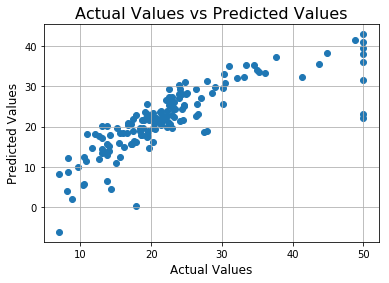

In [15]:
plt.scatter(Y_Test,pred_custom_SGD_1D)
plt.xlabel("Actual Values",size=12)
plt.ylabel("Predicted Values",size=12)
plt.title("Actual Values vs Predicted Values",size=16)
plt.grid()
plt.show()

<b> <font color="black"> PDF of Error with SGD Custom Implementation:- </font> </b>

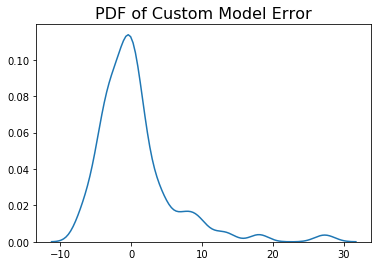

In [16]:
import seaborn as sns

model_error = Y_Test - pred_custom_SGD_1D
sns.kdeplot(model_error)
plt.title("PDF of Custom Model Error",size = 16)
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error

MSE_custom = mean_squared_error(Y_Test,pred_custom_SGD)
print ("The MSE with the Custom Implementation of SGD: " + str(MSE_custom))

The MSE with the Custom Implementation of SGD: 30.72455054816487


# SKLearn's SGD Implementation :-

In [18]:
from sklearn import linear_model

SGD_sklearn = SGDRegressor(penalty='none', max_iter=160, learning_rate='constant')
SGD_sklearn.fit(X_Train_sc,Y_Train)
SGD_sklearn_pred = SGD_sklearn.predict(X_Test_sc)

Here the 'penalty' is kept at none because we do not want to carry out any form of regularization and learning_rate
is kept as constant just like in the previous case. max_iter= 1 Million, the exact value taken previously. 

In [19]:
weight_sklearn = SGD_sklearn.coef_
print(weight_sklearn)

[-1.01632398  0.91949532  0.08516744  0.06841673 -1.36453469  1.67665901
 -0.40031149 -2.37020245  2.41191686 -2.09763087 -1.81131983  1.31244423
 -2.54373333]


<b> <font color="black"> SKLearn Implementation: Actual Values vs Predicted Values :- </font> </b>

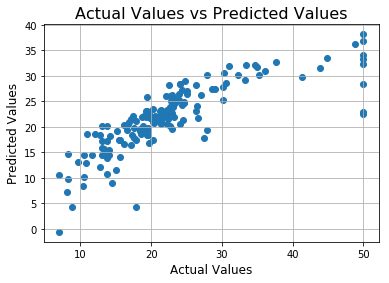

In [20]:
plt.scatter(Y_Test,SGD_sklearn_pred)
plt.xlabel("Actual Values",size=12)
plt.ylabel("Predicted Values",size=12)
plt.title("Actual Values vs Predicted Values",size=16)
plt.grid()
plt.show()

<b> <font color="black"> PDF of Error with SKLearn's SGD Implementation:- </font> </b>

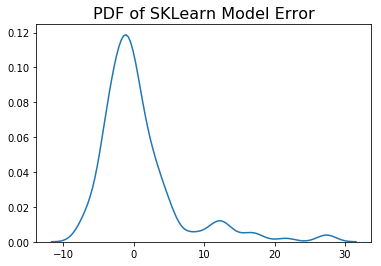

In [21]:
Sklearn_error = Y_Test - SGD_sklearn_pred
sns.kdeplot(Sklearn_error)
plt.title("PDF of SKLearn Model Error",size = 16)
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error

MSE_SKLearn = mean_squared_error(Y_Test,SGD_sklearn_pred)
print("The MSE with the SKLearn Implementation of SGD: " + str(MSE_SKLearn))

The MSE with the SKLearn Implementation of SGD: 34.833456361542616


# Comparison of the 2 Implementations :-

<b> <font color="black"> Comparison of the Weights:- </font> </b>

In [23]:
from prettytable import PrettyTable
y = PrettyTable()

In [24]:
column_names = ['S.No.','Weights with the Custom SGD Implementation','Weights with the SKLearn SGD Implementation']

In [25]:
s_no=[]
for i in range(1,14):
    s_no.append(i)

In [26]:
y.add_column(column_names[0],s_no)
y.add_column(column_names[1],np.round(weight_custom,3))
y.add_column(column_names[2],np.round(weight_sklearn,3))
print(y)

+-------+--------------------------------------------+---------------------------------------------+
| S.No. | Weights with the Custom SGD Implementation | Weights with the SKLearn SGD Implementation |
+-------+--------------------------------------------+---------------------------------------------+
|   1   |                   -1.248                   |                    -1.016                   |
|   2   |                   0.899                    |                    0.919                    |
|   3   |                   -0.309                   |                    0.085                    |
|   4   |                   0.204                    |                    0.068                    |
|   5   |                   -1.449                   |                    -1.365                   |
|   6   |                    2.83                    |                    1.677                    |
|   7   |                   -0.331                   |                     -0.4            

<b> <font color="black"> Comparison of the MSEs :- </font> </b>

In [27]:
z = PrettyTable()
z.field_names=['Type of Implementation','MSE']

In [28]:
z.add_row(['Custom SGD Implementation',np.round(MSE_custom,3)])
z.add_row(['SKLearn SGD Implementation',np.round(MSE_SKLearn,3)])
print(z)

+----------------------------+--------+
|   Type of Implementation   |  MSE   |
+----------------------------+--------+
| Custom SGD Implementation  | 30.725 |
| SKLearn SGD Implementation | 34.833 |
+----------------------------+--------+


# Conclusion :-

1. The Weights obtained with the SGD Custom Implementation and SGD SKLearn Implementation are very similar and comparable. 
2. The Mean Square Error obtained for the 2 Implementations is also very similar and comparable. However for the same number of iterations and a constant learning rate the MSE for the Custom SGD Implementation is lower and hence the custom implementation in this case is performing better than the SKLearn Implementation.